In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('cleaned_CO2_emission.csv')

In [17]:
df

,Country Name,country_code,Region,Indicator Name,Year,CO2
0,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),1995,0.068468
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),1996,0.062588
2,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),1997,0.056827
3,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),1998,0.052691
4,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),1999,0.040157
...,...,...,...,...,...,...
4244,Zimbabwe,ZWE,Sub-Saharan Africa,CO2 emissions (metric tons per capita),2015,0.899770
4245,Zimbabwe,ZWE,Sub-Saharan Africa,CO2 emissions (metric tons per capita),2016,0.785441
4246,Zimbabwe,ZWE,Sub-Saharan Africa,CO2 emissions (metric tons per capita),2017,0.726297
4247,Zimbabwe,ZWE,Sub-Saharan Africa,CO2 emissions (metric tons per capita),2018,0.857411


Visualization and analysis of data

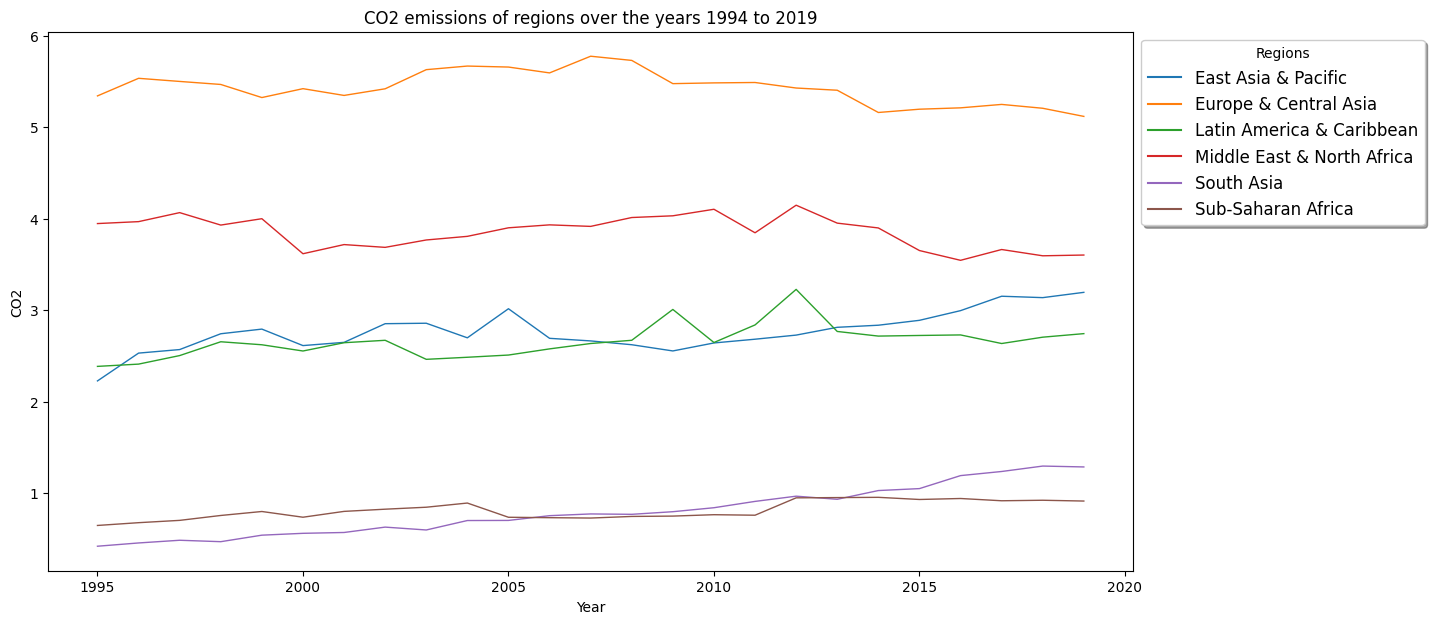

In [18]:
region = df[['Region', 'Year', 'CO2']].groupby(['Region', 'Year']).mean()
plt.figure(figsize = (14, 7))
plt.title('CO2 emissions of regions over the years 1994 to 2019')
sns.lineplot(x = 'Year', y = 'CO2', hue = 'Region', units = 'Region', markers = True, dashes = False, estimator = None, lw = 1, data = region)
plt.legend(bbox_to_anchor = (1, 1), shadow = True, fontsize = 'large', title = 'Regions')
plt.show()

In [19]:
px.choropleth(data_frame=df,
              locations="Country Name",
              locationmode='country names',
              animation_frame="Year",
              color='CO2',
              color_continuous_scale = 'Portland',
              height=600,
              title="CO2 emissions of countries over the years 1995 to 2019")

In [20]:
dfc = df.groupby('Country Name')['CO2'].sum().reset_index()
dfc

,Country Name,CO2
0,Afghanistan,2.891206
1,Albania,32.494778
2,Algeria,77.989693
3,Andorra,168.451135
4,Angola,23.826887
...,...,...
174,"Venezuela, RB",134.802106
175,Vietnam,35.633062
176,"Yemen, Rep.",20.914204
177,Zambia,5.980406


In [21]:
data1 = dfc.sort_values(by = ['CO2'], ascending  = False).head(1)
data2 = dfc.sort_values(by = ['CO2'], ascending = True).head(1)
hl_data = pd.concat([data1, data2])
hl_data.index = ['Highest', 'Lowest']
hl_data

,Country Name,CO2
Highest,Japan,231.911386
Lowest,Burundi,0.880778


In [22]:
df2 = df.groupby(["Region","Country Name"])["CO2"].sum().round(decimals=2).to_frame()
df2["Rank"] = df2.groupby("Region")["CO2"].rank(method="first",ascending=False)
df2[df2["Rank"]<=3].sort_values(by=["Region","Rank"])

CO2  Rank
Region                     Country Name                     
East Asia & Pacific        Japan                231.91   1.0
                           New Zealand          184.53   2.0
                           Singapore            172.18   3.0
Europe & Central Asia      Austria              202.10   1.0
                           Poland               201.47   2.0
                           United Kingdom       196.78   3.0
Latin America & Caribbean  Bahamas, The         169.22   1.0
                           Venezuela, RB        134.80   2.0
                           Antigua and Barbuda  122.31   3.0
Middle East & North Africa Israel               215.03   1.0
                           Libya                213.60   2.0
                           Iran, Islamic Rep.   162.10   3.0
South Asia                 Maldives              60.85   1.0
                           India                 30.35   2.0
                           Pakistan              19.31   3.0
Sub-Saharan Africa         South Africa         187.68   1.0
                           Seychelles           115.40   2.0
                           Equatorial Guinea     98.35   3.0

In [23]:
countries_ems_first = df[df["Year"]==1995].groupby("Country Name")["CO2"].sum()
countries_ems_overall = df.groupby("Country Name")["CO2"].sum()
countries_first_overall_ems = pd.concat([countries_ems_first.rename("First Emission"),countries_ems_overall.rename("Overall Emission")],axis=1).round(decimals=2)
countries_first_overall_ems["CO2 Emission Change"] = abs(countries_first_overall_ems["Overall Emission"] - countries_first_overall_ems["First Emission"])
countries_first_overall_ems.sort_values(by="CO2 Emission Change",ascending=False).head(10)

,First Emission,Overall Emission,CO2 Emission Change
Country Name,,,
Japan,9.33,231.91,222.58
Israel,8.44,215.03,206.59
Libya,8.79,213.60,204.81
Austria,7.70,202.10,194.40
Poland,8.81,201.47,192.66
Greece,7.84,196.07,188.23
United Kingdom,9.08,196.78,187.70
Norway,7.89,195.53,187.64
South Africa,6.38,187.68,181.30


In [24]:
countries_first_overall_ems.sort_values(by="CO2 Emission Change",ascending=True).head(10)

,First Emission,Overall Emission,CO2 Emission Change
Country Name,,,
Burundi,0.03,0.88,0.85
"Congo, Dem. Rep.",0.05,1.07,1.02
Central African Republic,0.05,1.27,1.22
Somalia,0.08,1.38,1.30
Malawi,0.08,1.64,1.56
Rwanda,0.08,1.86,1.78
Niger,0.06,1.85,1.79
Ethiopia,0.05,2.16,2.11
Chad,0.06,2.20,2.14


In [25]:
df3 = df.groupby(["Country Name", "Year"])["CO2"].sum().round(decimals=2).reset_index()
df3.to_csv('top_co2.csv', index=False)

In [26]:
dfc2 = (df.groupby(["Country Name", "Year"])['CO2'].sum().round(decimals=2).reset_index()
      .rename(columns={'Country Name': 'Country'})
      .sort_values(by=['Year','Country']))

last_dft = dfc2.drop_duplicates(subset='Country', keep="last")
last_dft=last_dft.sort_values(by=['Country','Year']).reset_index(drop=True)

first_dft = dfc2.drop_duplicates(subset='Country', keep="first")
first_dft=first_dft.sort_values(by=['Country','Year']).reset_index(drop=True)

last_dft = last_dft.rename(columns={"CO2": "CO2_new"}).drop(['Year'], axis=1)
first_dft = first_dft.rename(columns={"CO2": "CO2_last"}).drop(['Year',  'Country'], axis=1)



dfc2 = pd.concat([last_dft, first_dft], axis=1)
dfc2['difference'] = dfc2["CO2_new"] - dfc2["CO2_last"]



In [27]:
# global yearly stats:
# - average, min, max temperature per year 
# - date and location (city/country/region) of lowest temperature during this year
# - date and location (city/country/region) of highest temperature during this year

dfc2 = dfc2.sort_values(by=['difference'], ascending=False)

# hottest cities graph
table = px.bar(dfc2.head(20),
                      x='Country',
                      y='difference',
                      color='difference',
                      color_continuous_scale='bluered',
                      hover_data=['Country', 'difference'],
                      opacity=0.8)

table.show()

table2 = px.bar(dfc2.tail(20),
                      x='Country',
                      y='difference',
                      color='difference',
                      color_continuous_scale='bluered',
                      hover_data=['Country', 'difference'],
                      opacity=0.8)

table2.show()

In [28]:
dfc2.reset_index().to_csv('top_co2_diff.csv', index=False)